# 3D test case: Baroclinic Instability

In [76]:
import h5py
import numpy as np
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('classic')
%matplotlib inline

import converter
from importlib import reload
reload(converter)

<module 'converter' from '/home/ray/git-projects/RKLM_Reference/visualiser_debugger/converter.py'>

In [126]:
#####################################################
#
# Time labels for C and Python
#
def get_time(t_label):
    label = t_label + '_' + 'ic'
#     label = t_label + '_' + 'before_advect'
#     label = t_label + '_' + 'after_advect'
#     label = t_label + '_' + 'after_ebnaexp'
#     label = t_label + '_' + 'after_ebnaimp'
#     label = t_label + '_' + 'after_half_step'
#     label = t_label + '_' + 'after_efna'
#     label = t_label + '_' + 'after_full_advect'
#     label = t_label + '_' + 'after_full_ebnaexp'
#     label = t_label + '_' + 'after_full_step'
    return label
#
#####################################################

#####################################################
#
# C-output folder names
#
base_suffix = '_baroclinic_instability_periodic/'
# 
#####################################################
#
# and its filename
#
# py_filename = "output_acoustic_wave_high_low_mach_gravity_comp.h5"
# py_filename = "output_internal_long_wave_low_mach_gravity_comp.h5"
# py_filename = "output_travelling_vortex_3d_48_low_mach_gravity_comp.h5"

#####################################################

figsize_tuple = (12,3)

In [127]:
base_folder_name = "../RKLM_Reference/output"

base_path = base_folder_name + base_suffix
folder_comp = "low_Mach_gravity_comp/"
folder_psinc = "low_Mach_gravity_psinc/"

# Manually list the folder names for each directory
directories = ['rho']
directories += ['S']
directories += ['T']
directories += ['Y']
directories += ['buoy']
directories += ['dT'] 
directories += ['dY']
directories += ['dp2_c']
directories += ['dp2_nodes']
directories += ['dpdim']
directories += ['drhoY'] 
directories += ['p']
directories += ['p2_c']
directories += ['p2_nodes']
directories += ['u']
directories += ['v']
directories += ['w']
directories += ['vortz']
directories += ['rhoY']
directories += ['rhoe']
directories += ['rhou']
directories += ['rhov']
directories += ['rhow']
directories += ['rhs']
directories += ['buoy']

# And manually list the file names.
filenames = ['rho']
filenames += ['S'] 
filenames += ['T']
filenames += ['Y']
filenames += ['buoy']
filenames += ['dT']
filenames += ['dY']
filenames += ['dp2_c']
filenames += ['dp2_n']
filenames += ['dpdim']
filenames += ['drhoY'] 
filenames += ['p']
filenames += ['p2_c']
filenames += ['p2_n']
filenames += ['u']
filenames += ['v']
filenames += ['w']
filenames += ['vortz']
filenames += ['rhoY']
filenames += ['rhoe']
filenames += ['rhou']
filenames += ['rhov']
filenames += ['rhow']
filenames += ['rhs']
filenames += ['buoy']

In [128]:
# manually specific folder names
test_cases_folders = ['p2_nodes']
test_cases_folders += ['rho']
test_cases_folders += ['rhoY']
test_cases_folders += ['rhoe']
test_cases_folders += ['rhou']
test_cases_folders += ['rhov']
test_cases_folders += ['rhow']
test_cases_folders += ['u']
test_cases_folders += ['v']
test_cases_folders += ['vortz']
test_cases_folders += ['dT'] 
test_cases_folders += ['Y']
test_cases_folders += ['dY']
test_cases_folders += ['buoy']

# and filenames
test_cases_names = ['p2_n']
test_cases_names += ['rho']
test_cases_names += ['rhoY']
test_cases_names += ['rhoe']
test_cases_names += ['rhou']
test_cases_names += ['rhov']
test_cases_names += ['rhow']
test_cases_names += ['u']
test_cases_names += ['v']
test_cases_names += ['vortz']
test_cases_names += ['dT']
test_cases_names += ['Y']
test_cases_names += ['dY']
test_cases_names += ['buoy']

(69, 37, 69)


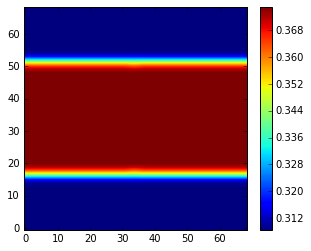

In [130]:
t_label = '000'
time = get_time(t_label)

converter_obj = converter.convert(base_path,folder_comp,time,t_label)
converter_obj.convert_files(directories,filenames)
c = converter_obj.get_converted_files(test_cases_folders, test_cases_names)

# print(c.Y[10])
plt.figure()
print(c.rho.shape)
plt.imshow(c.rho[:,19,:].T, origin='lower')
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

In [138]:
AA = np.arange(60).reshape(4,3,5)
print(AA.shape)
AA[...] = 0.0

BB = np.arange(12).reshape(4,3)
print(BB.shape)
AA[...,:] = BB[:,:,np.newaxis]
print(AA)

nspec = 3
size = [37]
print(list(size))
rhoX = np.zeros(([nspec] + list(size)))
print(rhoX.shape)

(4, 3, 5)
(4, 3)
[[[ 0  0  0  0  0]
  [ 1  1  1  1  1]
  [ 2  2  2  2  2]]

 [[ 3  3  3  3  3]
  [ 4  4  4  4  4]
  [ 5  5  5  5  5]]

 [[ 6  6  6  6  6]
  [ 7  7  7  7  7]
  [ 8  8  8  8  8]]

 [[ 9  9  9  9  9]
  [10 10 10 10 10]
  [11 11 11 11 11]]]
[37]
(3, 37)


TypeError: object of type 'int' has no len()